# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
-0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.002
0.002
0.002
0.0
0.0
0.0
0.0
0.003
0.003
-0.002
-0.003
-0.004
-0.002
-0.005
0.0
-0.004
-0.004
-0.002
0.994
1.002
1.002
0.998
0.998
1.994
2.0
1.999
1.998
1.998
2.994
2.998
2.999
2.997
2.998
3.992
3.996
3.995
3.994
3.995
4.993
4.992
4.99
4.991
5.99
5.989
5.987
5.989
6.723
6.723
6.722
6.723
7.46
7.46
7.46
7.459
8.454
8.459
8.459
8.458
8.457
9.449
9.454
9.455
9.454
9.454
10.439
10.446
10.444
10.443
10.443
11.439
11.445
11.445
11.444
11.444
12.44
12.445
12.445
12.444
12.443
13.436
13.443
13.443
13.441
13.441
14.038
14.038
14.038
14.038
14.635
14.64
14.64
14.639
14.638
15.63
15.634
15.634
15.633
15.634
16.63
16.635
16.635
16.633
16.636
17.628
17.634
17.634
17.633
17.634
18.628
18.633
18.633
18.631
18.632
19.629
19.633
19.633
19.629
19.631
20.626
20.63
20.631
20.629
20.631
21.584
21.584
21.583
21.583
22.535
22.535
22.533
22.532
23.521
23.518
23.518
23.518
24.52
24.52
24.518
24.

57.246
57.246
57.246
57.246
57.246
57.245
57.245
57.245
57.245
57.245
57.245
57.244
57.243
57.243
57.245
57.244
57.243
57.289
57.332
57.374
57.373
57.413
57.457
57.457
57.457
57.457
57.457
57.457
57.472
57.472
57.472
57.472
57.472
57.472
57.472
57.472
57.472
57.472
57.47
57.473
57.472
57.47
57.47
57.47
57.469
57.469
57.469
57.469
57.469
57.469
57.468
57.468
57.468
57.468
57.468
57.468
57.468
57.468
57.468
57.467
57.467
57.467
57.466
57.466
57.466
57.467
57.467
57.467
57.467
57.467
57.467
57.465
57.464
57.464
57.466
57.465
57.519
57.519
57.571
57.617
57.617
57.662
57.662
57.662
57.662
57.69
57.69
57.69
57.69
57.708
57.708
57.708
57.708
57.708
57.707
57.707
57.707
57.707
57.708
57.709
57.708
57.707
57.707
57.707
57.706
57.706
57.706
57.706
57.706
57.705
57.705
57.705
57.704
57.704
57.704
57.704
57.704
57.704
57.704
57.703
57.703
57.703
57.703
57.703
57.703
57.703
57.703
57.703
57.703
57.703
57.703
57.703
57.702
57.702
57.702
57.702
57.702
57.702
57.762
57.819
57.873
57.92
57.92
57.967
57

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,-0.001
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1562,3124,60.079
1563,3126,60.082
1564,3128,60.081
1565,3130,60.082


<IPython.core.display.Javascript object>


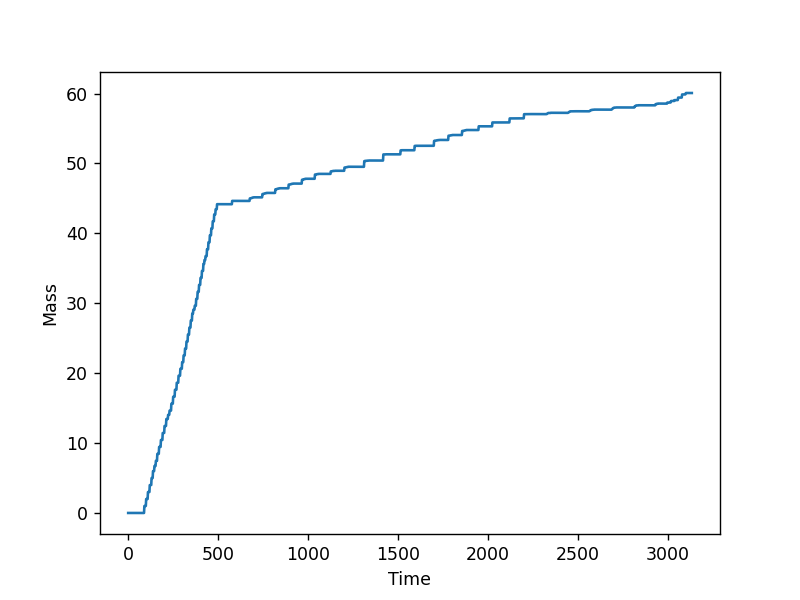

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_180423_S319-324.csv')